In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the data and modify its column names
df_weather_daylight = pd.read_csv('London_Monthly_Daylight_Hours_Averages.csv', names=['Date', 'Daylight_Hours'], header=0)
df_weather_temp = pd.read_csv('London_Monthly_Temperature_Averages.csv', names=['Date', 'Average_Temperature'], header=0)

# Merge the monthly daylight hours and temperature in one dataframe.
df_weather = df_weather_daylight.merge(df_weather_temp, on = 'Date')

In [3]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 36 non-null     object 
 1   Daylight_Hours       36 non-null     float64
 2   Average_Temperature  36 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [4]:
df_weather.head()

,Date,Daylight_Hours,Average_Temperature
0,2019-01-31,7.97,4.47
1,2019-02-28,9.46,7.11
2,2019-03-31,11.39,9.03
3,2019-04-30,13.40,9.95
4,2019-05-31,15.16,12.66


### Add date/time features

In [5]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%Y-%m-%d')
df_weather['Year'] = df_weather.Date.dt.year
df_weather['Month'] = df_weather.Date.dt.month

In [6]:
df_weather.head()

,Date,Daylight_Hours,Average_Temperature,Year,Month
0,2019-01-31,7.97,4.47,2019,1
1,2019-02-28,9.46,7.11,2019,2
2,2019-03-31,11.39,9.03,2019,3
3,2019-04-30,13.40,9.95,2019,4
4,2019-05-31,15.16,12.66,2019,5


### Correlation
Monthly average temperature and average daylight hours are highlt correlated to one another. As the temperature increases, the daylight hour also inceases. 

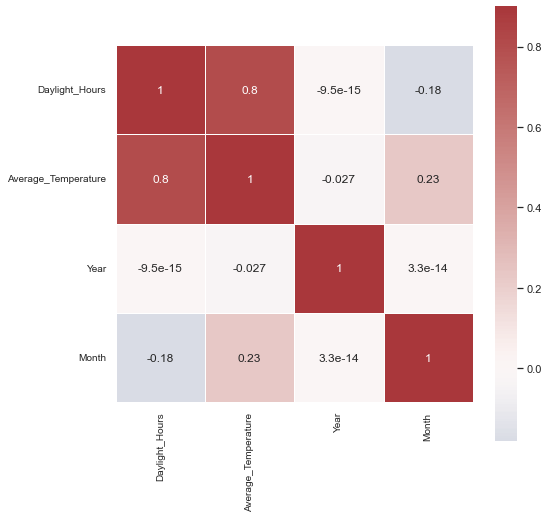

In [7]:
# Get Correlation Matrix
corrmat = df_weather.corr()
corrmat
plt.rcParams["figure.figsize"] = (8,8)
sns. set(font_scale=1)
x = sns.heatmap(corrmat, annot=True,  cmap='vlag', center = 0,  vmax=.9, square=True, linewidths=1)
x.tick_params(labelsize=10)

<AxesSubplot:>

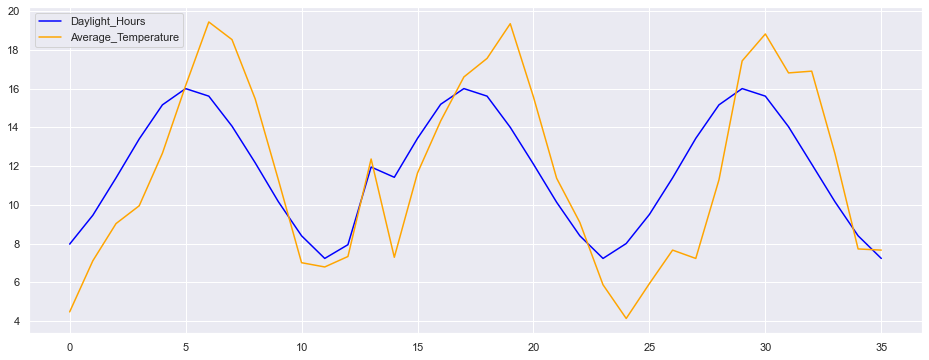

In [8]:
# Better visualization of the two columns
df_weather[['Daylight_Hours', 'Average_Temperature']].plot(figsize=(16,6), color=['blue', 'orange'])

### Feature Frequency Distributions

In [9]:
df_weather.columns

Index(['Date', 'Daylight_Hours', 'Average_Temperature', 'Year', 'Month'], dtype='object')

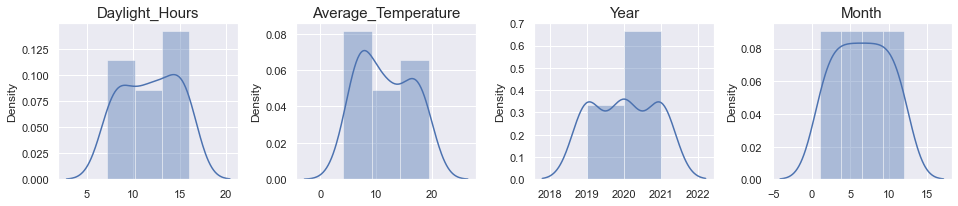

In [10]:
list = ['Daylight_Hours',  'Average_Temperature', 'Year', 'Month']

plt.rcParams["figure.figsize"] = (20,8)

df_forplot = df_weather.loc[:,df_weather.select_dtypes(include = ['int', 'float']).columns]

i=0
for var in list:
    i=i+1
    plt.subplot(3,6,i)
    sns.distplot(df_forplot[[var]])
    plt.title(var, fontdict = {'fontsize':15})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [11]:
df_weather.describe()

,Daylight_Hours,Average_Temperature,Year,Month
count,36.000000,36.000000,36.000000,36.00000
mean,11.817222,11.680379,2020.000000,6.50000
std,2.997237,4.741192,0.828079,3.50102
min,7.230000,4.130000,2019.000000,1.00000
25%,9.195000,7.320000,2019.000000,3.75000
50%,12.025000,11.330000,2020.000000,6.50000
75%,14.335000,16.262500,2021.000000,9.25000
max,16.000000,19.440000,2021.000000,12.00000


##### Relationship of Temp by year/month

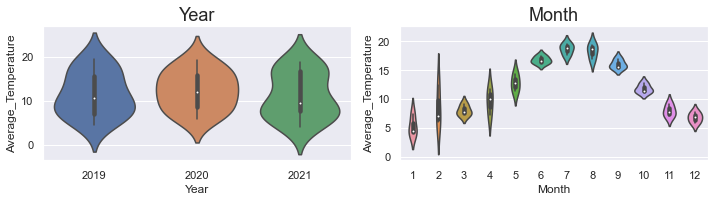

In [12]:
list = ['Year', 'Month']
plt.rcParams["figure.figsize"] = (20,5)

i=0
for var2 in ['Average_Temperature']:
    for var in list:
        i=i+1
        plt.subplot(2,4,i)
        sns.violinplot(data=df_weather, x=var, y=var2)
        plt.title(var, fontdict = {'fontsize':18})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

##### Relationship of Daylight Hours by year/month

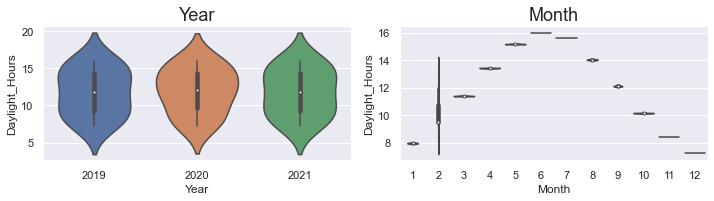

In [13]:
list = ['Year', 'Month']
plt.rcParams["figure.figsize"] = (20,5)

i=0
for var2 in ['Daylight_Hours']:
    for var in list:
        i=i+1
        plt.subplot(2,4,i)
        sns.violinplot(data=df_weather, x=var, y=var2)
        plt.title(var, fontdict = {'fontsize':18})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

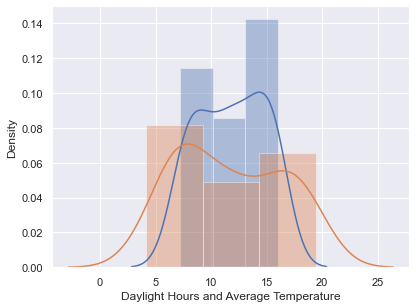

In [14]:
sns.distplot(df_weather['Daylight_Hours']) #blue
sns.distplot(df_weather['Average_Temperature'], axlabel= 'Daylight Hours and Average Temperature'); #orange

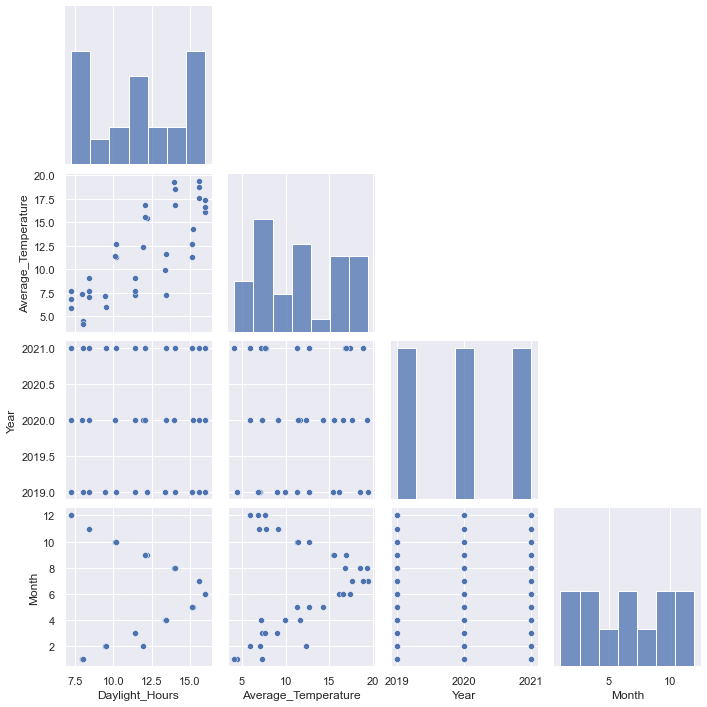

In [15]:
sns.pairplot(df_weather, corner = True)

###### KEY NOTES:
1. The coldest months are November, December, and January.